In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
%matplotlib inline
plt.style.use('bmh')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score, accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz

In [3]:
from IPython.display import display
import IPython
import graphviz

In [4]:
import re
import math

In [5]:
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_period_dtype
from sklearn.preprocessing import LabelEncoder, Imputer, StandardScaler
from sklearn_pandas import DataFrameMapper

In [6]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df = pd.concat([df_train.drop('Survived', axis=1), df_test])

In [7]:
df_train_raw = pd.read_csv('data/train.csv')
df_test_raw = pd.read_csv('data/test.csv')

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [12]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1
Pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
Name,891,891,"Hagland, Mr. Konrad Mathias Reiersen",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80
SibSp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
Parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
Ticket,891,681,CA. 2343,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329


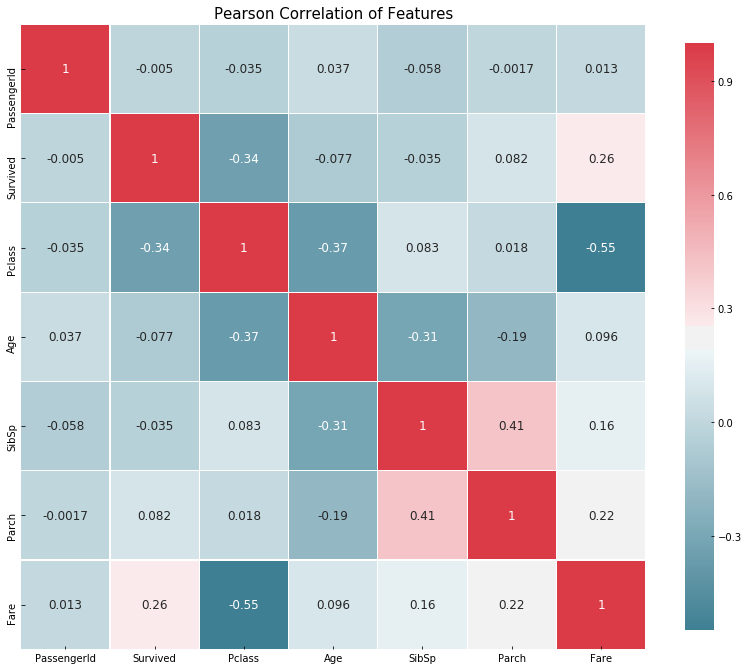

In [13]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df_train)

In [14]:
def get_samples(df, n):
    idxs = sorted(np.random.permutation(len(df))[:n])
    return df.iloc[idxs].copy()

def parallel_trees(m, fn, n_jobs=8):
    return list(ProcessPoolExecutor(n_jobs).map(fn, m.estimators_))

def rf_feature_imp(m, df):
    return pd.DataFrame({'cols': df.columns, 'imp': m.feature_importances_}).sort_values('imp', ascending=False)


def set_rf_samples(n):
    forest._generate_sample_indices = (lambda rs, n_samples: 
                                       forest.check_random_state(rs).randint(0, n_samples, n))
    
def reset_rf_samples():
    forest._generate_sample_indices = (lambda rs, n_samples: 
                                       forest.check_random_state(rs).randint(0, n_samples, n_samples))
    
    
def train_cats(df):
    for n,c in df.items():
        if is_string_dtype(c): df[n] = c.astype('category').cat.as_ordered()
            
            
def apply_cats(df, trn):
    for n, c in df.items():
        if (n in trn.columns) and (trn[n].dtype.name=='category'):
            df[n] = pd.Categorical(c, categories=trn[n].cat.categories, ordered=True)
            
def numericalize(df, col, name, max_n_cat):
    if not is_numeric_dtype(col) and ( max_n_cat is None or len(col.cat.categories)>max_n_cat):
        df[name] = col.cat.codes+1
        
        
def get_sample(df, n):
    idxs = sorted(np.random.permutation(len(df))[:n])
    return df.iloc[idxs].copy()


def fix_missing(df, col, name, na_dict):
    if is_numeric_dtype(col):
        if pd.isnull(col).sum() or (name in na_dict):
            df[name+'_na'] = pd.isnull(col)
            filler = na_dict[name] if name in na_dict else col.median()
            df[name] = col.fillna(filler)
            na_dict[name] = filler
    return na_dict


def scale_vars(df, mapper):
    warnings.filterwarnings('ignore', category=sklearn.exceptions.DataConversionWarning)
    if mapper is None:
        map_f = [([n], StandardScaler()) for n in df.columns if is_numeric_dtype(df[n])]
        mapper = DataFrameMapper(map_f).fit(df)
    df[mapper.transformed_name_] = mapper.transform(df)
    return mapper


def numericalize(df, col, name, max_n_cat):
    if not is_numeric_dtype(col) and (max_n_cat is None or len(col.cat.categories) > max_n_cat):
        df[name] = col.cat.codes+1
        
        
def proc_df(df, y_fld, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None,
            preproc_fn=None, max_n_cat=None, subset=None, mapper=None):
    if not skip_flds: skip_flds=[]
    if not ignore_flds: ignore_flds=[]
    if subset:
        df = get_sample(df, subset)
    else:
        df = df.copy()
    ignored_flds = df.loc[:, ignore_flds]
    df.drop(ignore_flds, axis=1, inplace=True)
    if preproc_fn:
        preproc_fn(df)
    if y_fld is None:
        y = None
    else:
        if not is_numeric_dtype(df[y_fld]):
            df[y_fld] = df[y_fld].cat.codes
        y = df[y_fld].values
        skip_flds += [y_fld]
    df.drop(skip_flds, axis=1, inplace=True)
    
    if na_dict is None:
        na_dict = {}
    else:
        na_dict = na_dict.copy()
    na_dict_initial = na_dict.copy()
    for n, c in df.items():
        na_dict = fix_missing(df, c, n, na_dict)
    if len(na_dict_initial.keys()) > 0:
        df.drop([a + '_na' for a in list(set(na_dict.keys()) - set(na_dict_initial.keys()))], axis=1, inplace=True)
    if do_scale:
        mapper = scale_vars(df, mapper)
    for n, c in df.items():
        numericalize(df, c, n, max_n_cat)
    df = pd.get_dummies(df, dummy_na=True)
    df = pd.concat([ignored_flds, df], axis=1)
    res = [df, y, na_dict]
    if do_scale:
        res = res + mapper
    return res


def split_vals(a, n):
    return a[:n].copy(), a[n:].copy()

def rmse(x, y):
    return math.sqrt(((x - y)**2).mean())

def print_score(m, X_train, y_train, X_test, y_test):
    res = [f1_score(m.predict(X_train), y_train),
           f1_score(m.predict(X_test), y_test),
           m.score(X_train, y_train), m.score(X_test, y_test)]
    if hasattr(m, 'oob_score_'):
        res.append(m.oob_score_)
    print(res)
    
    
def draw_tree(t, df, size=10, ratio=0.6, precision=0):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {', f'Tree {{ size = {size}; ratio={ratio}', s)))

In [15]:
# def feature_mapping(df, remove_columns = [], mapper=None):
#     training = False
#     dummies = []
#     if mapper is None:
#         mapper = {}
#         training = True

#     def extract_title_from_name(df):
#         df = df.copy()
#         df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
#         df.drop('Name', axis=1, inplace=True)
#         return df
    
#     def extract_prefix_from_ticket(df):
#         df = df.copy()
#         df['Ticket_prefix'] = df['Ticket'].apply(lambda x: x.split(' ')[0].replace(".", "").replace("/", "") if not x.split(' ')[0].isdigit() else 'X')
#         df.drop('Ticket', axis=1, inplace=True)
#         return df
    
#     def create_family_size(df):
#         df = df.copy()
#         df["Fsize"] = df["SibSp"] + df["Parch"] + 1
# #         df["Fsize"] = pd.cut(df["Fsize"], bins=[0,1,4,20], labels=[0,1,2])
#         df['Single'] = df['Fsize'].map(lambda x: 1 if x == 1 else 0)
#         df['Double'] = df['Fsize'].map(lambda x: 1 if x == 2 else 0)
#         df['Family'] = df['Fsize'].map(lambda x: 1 if 3 <= x <= 5 else 0)
#         df['Extended_Family'] = df['Fsize'].map(lambda x: 1 if x >= 6 else 0)
#         df.drop(['SibSp', 'Parch', 'Fsize'], axis=1, inplace=True)
#         return df
    
#     def map_title(df):
#         df = df.copy()
#         if training:
#             title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 2, "Mme": 3,"Don": 9,"Dona": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
#             mapper['Title_Map'] = title_mapping
#         else:
#             title_mapping = mapper['Title_Map']
#         df['Title'] = df['Title'].map(title_mapping)
#         df['Title'] = df['Title'].fillna(0)
#         return df
    
#     def map_sex(df):
#         df = df.copy()
#         if training:
#             sex_mapping = {"male": 1, "female": 2}
#             mapper['Sex'] = sex_mapping
#         else:
#             sex_mapping = mapper['Sex']
        
#         df['Sex'] = df['Sex'].map(sex_mapping)
#         df['Sex'] = df['Sex'].fillna(0)
#         return df

#     def change_ticket_detail(df):
#         df = df.copy()
#         table_ticket = pd.DataFrame(df["Ticket_prefix"].value_counts())
#         if training:   
#             ticket_mapper = df.groupby(['Ticket_prefix'], as_index=False)['PassengerId'].count().to_dict('records')
#             tmp = list(map(lambda x: tuple(x.values()), ticket_mapper))
#             def map_ticket_fn(x):
#                 l = 0
#                 if 1 <= x[1] <= 10:
#                     l = 1
#                 elif 11 <= x[1] <= 30:
#                     l = 2
#                 elif 30 <= x[1] <= 100:
#                     l = 3
#                 return (x[0], l)
#             tmp_map = dict(list(map(map_ticket_fn, tmp)))
#             mapper['Ticket_prefix'] = tmp_map
#         else:
#             tmp_map = mapper['Ticket_prefix']
# #         df["Ticket_prefix"] = pd.cut(df["Ticket_prefix"], bins=[0,1,4,20], labels=[0,1,2])
# #         df['Ticket_prefix'] = pd.cut(df_train_22.groupby(['Ticket_prefix'], as_index=False)['PassengerId'].count()['PassengerId'], 4, labels=[0,1, 2, 3])
#         df["Ticket_prefix"] = df["Ticket_prefix"].map(tmp_map)
#         df['Ticket_prefix'].fillna(0, inplace=True)
#         return df
    
#     def age_imputer(df): 
#         if training:
#             age_mapper = df[['Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex'], as_index=False).median()
#             mapper['age_mapper'] = age_mapper
#         else:
#             age_mapper = mapper['age_mapper']
#         def age_imputer_fn(row):
#             age = age_mapper.loc[(age_mapper['Pclass'] == row['Pclass']) & (age_mapper['Sex'] == row['Sex'])]['Age'] 
#             if math.isnan(row['Age']):
#                 return np.asscalar(age)
#             else:
#                 return float(row['Age'])
#         df['Age'] = df.apply(age_imputer_fn, axis=1)
#         df['Age'] = pd.cut(df['Age'], 5, labels=[1, 2, 3, 4, 5]).astype(int)
#         return df
    
#     def normalize_fare(df):
#         df = df.copy()
#         if training:
#             fare_map = df['Fare'].median()
#             mapper['fare_map'] = fare_map
#         else:
#             fare_map = mapper['fare_map']
#         df['Fare'].fillna(fare_map, inplace=True)
#         df['Fare'] = pd.qcut(df['Fare'], 4, labels=[1, 2, 3, 4]).astype(int)
#         return df
    
#     def normalize_age(df):
#         df['Age'] = df['Age'].apply(lambda x: np.log(x + 1))
#         return df
    
#     def map_embarked(df):
#         df = df.copy()
#         df["Embarked"] = df["Embarked"].fillna("S")
#         if training:
#             embarked = {'S': 1, 'C': 2, 'Q': 3} 
#             mapper['embarked'] = embarked
#         else:
#             embarked = mapper['embarked']
#         df['Embarked'] = df['Embarked'].map(embarked)
#         return df
    
    
#     def map_cabin(df):
#         df = df.copy()
#         def get_type_cabine(cabine):
#             # Use a regular expression to search for a title. 
#             cabine_search = re.search('\d+', cabine)
#             # If the title exists, extract and return it.
#             if cabine_search:
#                 num = cabine_search.group(0)
#                 if np.float64(num) % 2 == 0:
#                     return '2'
#                 else:
#                     return '1'
#             return '0'
#         df["CabinType"] = df["Cabin"].apply(get_type_cabine) 
#         df["CabinType"] = df["CabinType"].astype(int)
#         return df
    
#     def sex_dummies(df):
#         df = df.copy()
#         df['is_male'] = df['Sex'].map(lambda x: 1 if x == 1 else 0)
#         df['is_female'] = df['Sex'].map(lambda x: 1 if x == 2 else 0)
#         dummies.extend(['is_male', 'Sex'])
#         return df

#     def embarked_dummies(df):
#         df = df.copy()
#         df['Embarked_S'] = df['Embarked'].map(lambda x: 1 if x == 1 else 0)
#         df['Embarked_C'] = df['Embarked'].map(lambda x: 1 if x == 2 else 0)
#         df['Embarked_Q'] = df['Embarked'].map(lambda x: 1 if x == 3 else 0)
#         dummies.extend(['Embarked', 'Embarked_C'])
#         return df
    
#     def title_dummies(df):
#         df = df.copy()
#         df['Title_Rare'] = df['Title'].map(lambda x: 1 if x == 5 else 0)
#         df['Title_Mrs'] = df['Title'].map(lambda x: 1 if x == 3 else 0)
#         df['Title_Mr'] = df['Title'].map(lambda x: 1 if x == 1 else 0)
#         df['Title_Miss'] = df['Title'].map(lambda x: 1 if x == 2 else 0)
#         df['Title_Master'] = df['Title'].map(lambda x: 1 if x == 4 else 0)
#         return df
    
#     def remove_missing(df, columns_list, limit=0.0):
#         """
#         Deletes any column less than the provided limit
#         """
#         df = df.copy()
#         matching_column = [column for column in df if df[column].count() / len(df) <= limit]
#         columns_list.extend(matching_column)
#         df.drop(columns_list, axis = 1, inplace=True)
#         return df
    
#     def remove_dummy_variable_trap(df):
#         df = df.copy()
#         df.drop(['Embarked', 'Sex', 'Embarked_C', 'is_male', 'Cabin'], axis=1, inplace=True)
#         return df
    
#     def add_new_col(df):
#         df = df.copy()
#         df['Age_Class'] = df.Age * df.Pclass
#         return df

#     df = extract_title_from_name(df)
#     df = extract_prefix_from_ticket(df)
#     df = create_family_size(df)
#     df = map_title(df)
#     df = map_sex(df)
#     df = change_ticket_detail(df)
#     df = normalize_fare(df)
#     df = age_imputer(df)
#     df = map_embarked(df)
#     df = add_new_col(df)
# #     df = map_cabin(df)
# #     df = sex_dummies(df)
# #     df = embarked_dummies(df)
# #     df = title_dummies(df)
# #     df = map_cabin(df)
# #     df = remove_dummy_variable_trap(df)
#     df = remove_missing(df, remove_columns)
#     return df, mapper

In [16]:
train_cats(df_train_raw)
apply_cats(df_test_raw, df_train_raw)

In [17]:
df_trn, y, nas = proc_df(df_train_raw, 'Survived', max_n_cat=7)

In [19]:
df_valid, _, _ = proc_df(df_test_raw, None, nas, max_n_cat=7)

In [20]:
nas

{'Age': 28.0}

In [21]:
print(df_trn.info())
print("==" * 30)
print(df_valid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId     891 non-null int64
Pclass          891 non-null int64
Name            891 non-null int16
Age             891 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null int16
Fare            891 non-null float64
Cabin           891 non-null int16
Age_na          891 non-null bool
Sex_female      891 non-null uint8
Sex_male        891 non-null uint8
Sex_nan         891 non-null uint8
Embarked_C      891 non-null uint8
Embarked_Q      891 non-null uint8
Embarked_S      891 non-null uint8
Embarked_nan    891 non-null uint8
dtypes: bool(1), float64(2), int16(3), int64(4), uint8(7)
memory usage: 54.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId     418 non-null int64
Pclass          418 non-null int64
Name            418 non-null int16
Si

In [22]:
df_trn.drop('Age_na', axis=1, inplace=True)
df_valid.drop('Fare_na', axis=1, inplace=True)

In [23]:
# X = df_train_2_2.drop('Survived', axis=1)
# y = df_train_2_2.Survived

In [24]:
n_valid = 150
n_trn = len(df_trn) - n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y, n_trn)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_valid.shape[0]))

Training set has 741 samples.
Testing set has 150 samples.


In [25]:
# X_train, X_valid, y_train, y_valid = train_test_split(df_trn, 
#                                                     y, 
#                                                     test_size = 0.2, 
#                                                     random_state = 0)

# # Show the results of the split
# print("Training set has {} samples.".format(X_train.shape[0]))
# print("Testing set has {} samples.".format(X_test.shape[0]))

In [26]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=10)
%time m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

CPU times: user 24.6 ms, sys: 11.9 ms, total: 36.6 ms
Wall time: 115 ms
[0.9715302491103203, 0.7647058823529411, 0.9784075573549258, 0.84]


In [27]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=1, max_depth=3, bootstrap=False)
%time m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

CPU times: user 4.98 ms, sys: 2.28 ms, total: 7.26 ms
Wall time: 109 ms
[0.7465277777777777, 0.6890756302521008, 0.8029689608636977, 0.7533333333333333]


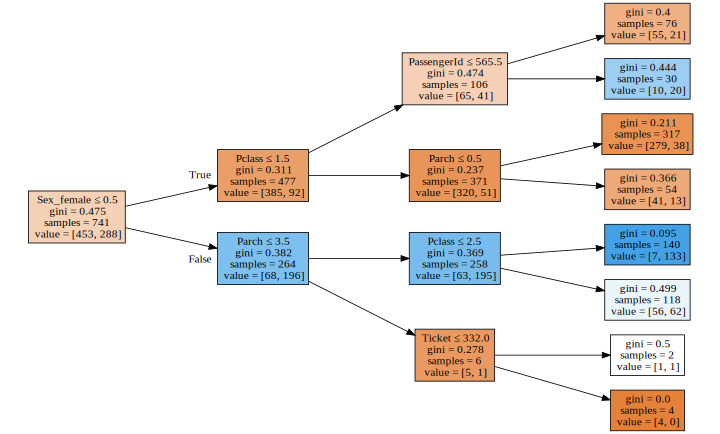

In [28]:
draw_tree(m.estimators_[0], df_trn, precision=3)

In [29]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=1, max_depth=5, bootstrap=False)
%time m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

CPU times: user 7.65 ms, sys: 4.11 ms, total: 11.8 ms
Wall time: 112 ms
[0.7868217054263567, 0.7524752475247524, 0.8515519568151148, 0.8333333333333334]


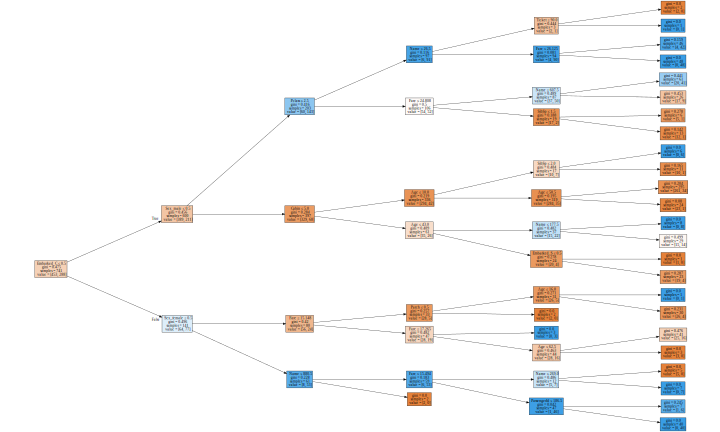

In [30]:
draw_tree(m.estimators_[0], df_trn, precision=3)

In [31]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=1, bootstrap=False)
%time m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

CPU times: user 6.56 ms, sys: 4.12 ms, total: 10.7 ms
Wall time: 110 ms
[1.0, 0.6041666666666667, 1.0, 0.7466666666666667]


In [32]:
m = RandomForestClassifier(n_estimators=10, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

[0.968421052631579, 0.7676767676767676, 0.9757085020242915, 0.8466666666666667]


In [33]:
m = RandomForestClassifier(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

[1.0, 0.780952380952381, 1.0, 0.8466666666666667, 0.815114709851552]


In [34]:
m = RandomForestClassifier(n_estimators=80, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

[1.0, 0.7924528301886792, 1.0, 0.8533333333333334, 0.8340080971659919]


In [35]:
m = RandomForestClassifier(n_estimators=20, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

[0.9876977152899824, 0.7238095238095239, 0.99055330634278, 0.8066666666666666, 0.8083670715249662]


In [36]:
m = RandomForestClassifier(n_estimators=80, max_features=0.5, max_depth=5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

[0.8560606060606061, 0.780952380952381, 0.8974358974358975, 0.8466666666666667, 0.8191632928475033]


In [37]:
m = RandomForestClassifier(n_estimators=80, max_features=0.5, max_depth=7, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

[0.9070631970260222, 0.7924528301886792, 0.9325236167341431, 0.8533333333333334, 0.8218623481781376]


In [39]:
m = RandomForestClassifier(n_estimators=80, max_features=0.5, max_depth=7, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

[0.9188191881918818, 0.7692307692307692, 0.9406207827260459, 0.84, 0.8245614035087719]


## Confidence based on tree Variance

In [40]:
n_valid = 200
n_trn = len(df_trn)- n_valid
raw_train, raw_valid = split_vals(df_trn, n_trn)
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y, n_trn)
X_train.shape, y_train.shape, X_valid.shape

((691, 16), (691,), (200, 16))

In [41]:
m = RandomForestClassifier(n_estimators=40, max_features=0.5, max_depth=9, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

[0.94921875, 0.8108108108108109, 0.9623733719247467, 0.86, 0.8234442836468886]


In [42]:
fi = rf_feature_imp(m, df_trn); fi[:25]

,cols,imp
10,Sex_male,0.203904
9,Sex_female,0.130373
6,Ticket,0.126376
2,Name,0.117102
0,PassengerId,0.087707
3,Age,0.080851
7,Fare,0.079485
1,Pclass,0.074650
8,Cabin,0.038919
4,SibSp,0.027696


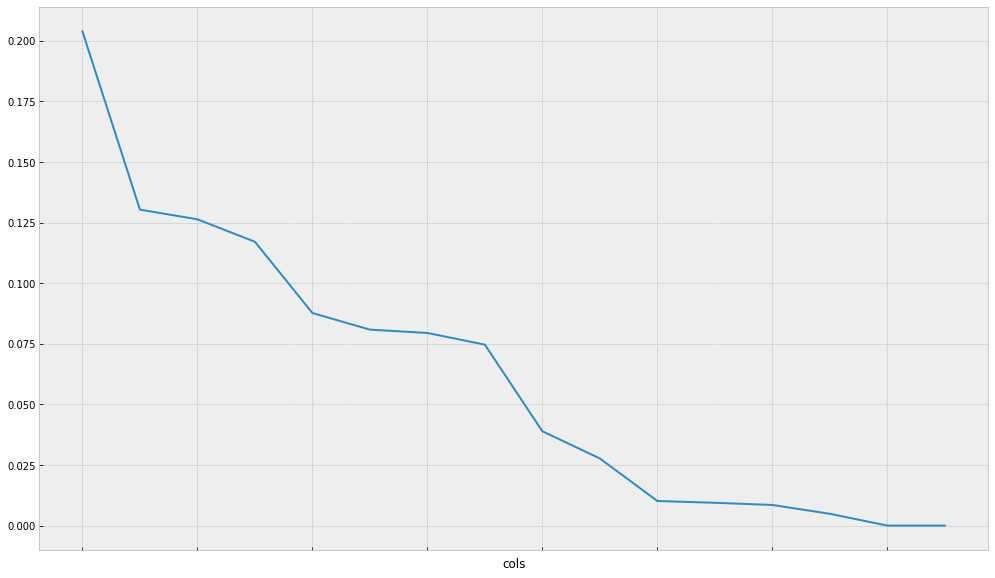

In [43]:
fi.plot('cols', 'imp', figsize=(17, 10), legend=False);

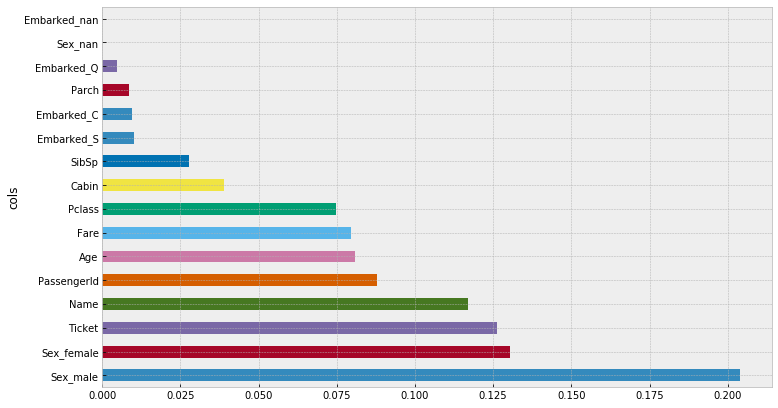

In [44]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12, 7), legend=False)

plot_fi(fi[:30])

In [45]:
to_keep = fi[fi.imp>0.000].cols; len(to_keep)

14

In [46]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

m = RandomForestClassifier(n_estimators=40, max_features=0.7, max_depth=9, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

[0.94921875, 0.8082191780821918, 0.9623733719247467, 0.86, 0.8219971056439942]


In [47]:
from scipy.cluster import hierarchy as hc
import scipy

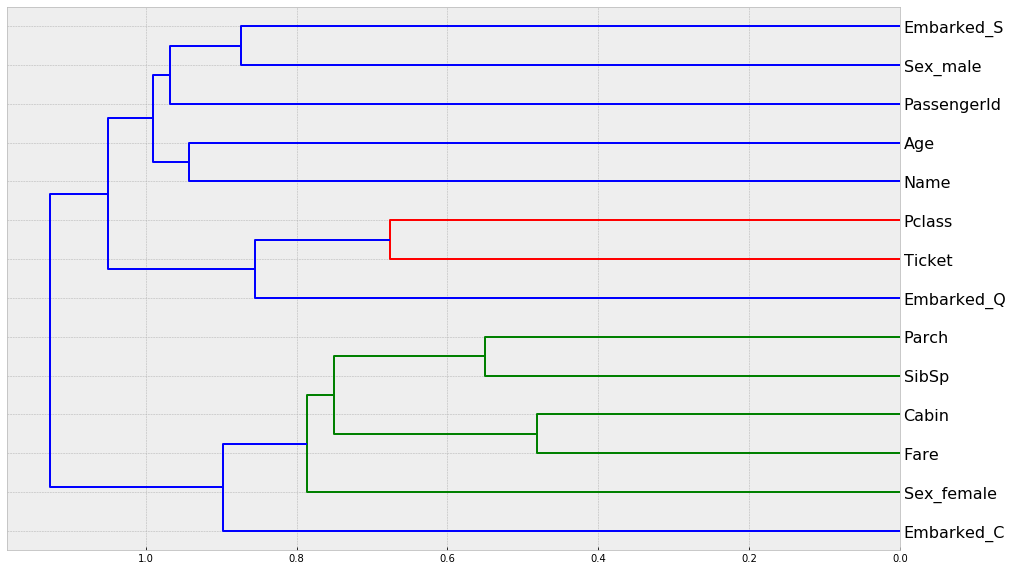

In [48]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16, 10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)


In [49]:
def get_oob(df):
    m = RandomForestClassifier(n_estimators=30, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [50]:
get_oob(df_keep)

0.8075253256150506

In [51]:
for c in ('PassengerId', 'Cabin'):
    print(c, get_oob(df_keep.drop(c, axis=1)))

PassengerId 0.7945007235890015
Cabin 0.8191027496382055


In [52]:
df_keep['Age_Class'] = df_keep.Age * df_keep.Pclass

In [53]:
df_keep.drop('PassengerId', axis=1, inplace=True)

In [54]:
get_oob(df_keep)

0.8017366136034733

In [55]:
df_keep["Fsize"] = df_keep["SibSp"] + df_keep["Parch"] + 1
df_keep['Single'] = df_keep['Fsize'].map(lambda x: 1 if x == 1 else 0)
df_keep['Double'] = df_keep['Fsize'].map(lambda x: 1 if x == 2 else 0)
df_keep['Family'] = df_keep['Fsize'].map(lambda x: 1 if 3 <= x <= 5 else 0)
df_keep['Extended_Family'] = df_keep['Fsize'].map(lambda x: 1 if x >= 6 else 0)

In [56]:
get_oob(df_keep)

0.8176555716353111

In [57]:
df_keep['Fare_q'] = pd.qcut(df_keep['Fare'], 5, labels=[1, 2, 3, 4, 5]).astype(int)

In [58]:
get_oob(df_keep)

0.8075253256150506

In [59]:
# Feature Engineering for Ticket, Name, Cabin

In [125]:
def feature_mapping(df, trn, remove_columns = [], mapper=None):
    training = True
    if mapper is None:
        mapper = {}
    else:
        training = False

    def extract_title_from_name(df):
        df = df.copy()
        df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
        if training:
            title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 2, "Mme": 3,"Don": 9,"Dona": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
            mapper['Title_Map'] = title_mapping
        else:
            title_mapping = mapper['Title_Map']
        df['Title'] = df['Title'].map(title_mapping)
        df['Title'] = df['Title'].fillna(0)
        df.drop('Name', axis=1, inplace=True)
        return df

    def extract_prefix_from_ticket(df):
        df = df.copy()
        df['Ticket_prefix'] = df['Ticket'].apply(lambda x: x.split(' ')[0].replace(".", "").replace("/", "") if not x.split(' ')[0].isdigit() else 'X')
        df.drop('Ticket', axis=1, inplace=True)
        return df

    def create_family_size(df):
        df = df.copy()
        df["Fsize"] = df["SibSp"] + df["Parch"] + 1
        df['Single'] = df['Fsize'].map(lambda x: 1 if x == 1 else 0)
        df['Double'] = df['Fsize'].map(lambda x: 1 if x == 2 else 0)
        df['Family'] = df['Fsize'].map(lambda x: 1 if 3 <= x <= 5 else 0)
        df['Extended_Family'] = df['Fsize'].map(lambda x: 1 if x >= 6 else 0)
        # df.drop(['SibSp', 'Parch', 'Fsize'], axis=1, inplace=True)
        return df
    
    def change_ticket_detail(df):
        df = df.copy()
        table_ticket = pd.DataFrame(df["Ticket_prefix"].value_counts())
        if training:   
            ticket_mapper = df.groupby(['Ticket_prefix'], as_index=False)['PassengerId'].count().to_dict('records')
            tmp = list(map(lambda x: tuple(x.values()), ticket_mapper))
            def map_ticket_fn(x):
                l = 0
                if 1 <= x[1] <= 10:
                    l = 1
                elif 11 <= x[1] <= 30:
                    l = 2
                elif 30 <= x[1] <= 100:
                    l = 3
                return (x[0], l)
            tmp_map = dict(list(map(map_ticket_fn, tmp)))
            mapper['Ticket_prefix'] = tmp_map
        else:
            tmp_map = mapper['Ticket_prefix']
#         df["Ticket_prefix"] = pd.cut(df["Ticket_prefix"], bins=[0,1,4,20], labels=[0,1,2])
#         df['Ticket_prefix'] = pd.cut(df_train_22.groupby(['Ticket_prefix'], as_index=False)['PassengerId'].count()['PassengerId'], 4, labels=[0,1, 2, 3])
        df["Ticket_prefix"] = df["Ticket_prefix"].map(tmp_map)
        df['Ticket_prefix'].fillna(0, inplace=True)
        return df
    
    def map_embarked(df):
        df = df.copy()
        df["Embarked"] = df["Embarked"].fillna("S")
        if training:
            embarked = {'S': 1, 'C': 2, 'Q': 3} 
            mapper['embarked'] = embarked
        else:
            embarked = mapper['embarked']
        df['Embarked'] = df['Embarked'].map(embarked)
        return df


    def age_imputer(df): 
        if training:
            age_mapper = df[['Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex'], as_index=False).median()
            mapper['age_mapper'] = age_mapper
        else:
            age_mapper = mapper['age_mapper']
        def age_imputer_fn(row):
            age = age_mapper.loc[(age_mapper['Pclass'] == row['Pclass']) & (age_mapper['Sex'] == row['Sex'])]['Age'] 
            if math.isnan(row['Age']):
                return np.asscalar(age)
            else:
                return float(row['Age'])
        df['Age'] = df.apply(age_imputer_fn, axis=1)
        df['Age'] = pd.cut(df['Age'], 5, labels=[1, 2, 3, 4, 5]).astype(int)
        return df

    def normalize_fare(df):
        df = df.copy()
        if training:
            fare_map = df['Fare'].median()
            mapper['fare_map'] = fare_map
        else:
            fare_map = mapper['fare_map']
        df['Fare'].fillna(fare_map, inplace=True)
        df['Fare'] = pd.qcut(df['Fare'], 4, labels=[1, 2, 3, 4]).astype(int)
        return df
    
    def cabin(df):
        df = df.copy()
        df.Cabin = df.Cabin.apply(lambda x: str(x)[0])
        if training:
            df['Cabin'] = df['Cabin'].astype('category').cat.as_ordered().cat.codes
        else:
            df['Cabin'] = pd.Categorical(trn.Cabin, categories=trn.Cabin.cat.categories, ordered=True)
        return df
        
    def embarked_dummies(df):
        df = df.copy()
        df['Embarked_S'] = df['Embarked'].map(lambda x: 1 if x == 1 else 0)
        df['Embarked_C'] = df['Embarked'].map(lambda x: 1 if x == 2 else 0)
        df['Embarked_Q'] = df['Embarked'].map(lambda x: 1 if x == 3 else 0)
        dummies.extend(['Embarked', 'Embarked_C'])
        return df
    
    def add_new_col(df):
        df = df.copy()
        df['Age_Class'] = df.Age * df.Pclass
        return df
    
    def remove_missing(df, columns_list, limit=0.0):
        """
        Deletes any column less than the provided limit
        """
        df = df.copy()
        matching_column = [column for column in df if df[column].count() / len(df) <= limit]
        columns_list.extend(matching_column)
        df.drop(columns_list, axis = 1, inplace=True)
        return df
    
    df = extract_title_from_name(df)
    df = extract_prefix_from_ticket(df)
    df = create_family_size(df)
    df = change_ticket_detail(df)
    df = normalize_fare(df)
    df = age_imputer(df)
    df = map_embarked(df)
    df = add_new_col(df)
    df = cabin(df)
    df = remove_missing(df, remove_columns)
    return df, mapper

In [126]:
df_trn2 = df_train.copy()

In [127]:
train_cats(df_trn2)

In [128]:
df_map, nas = feature_mapping(df_trn2, ['Survived', 'PassengerId'])

In [129]:
df_map_test = pd.get_dummies(df_map, columns=['Sex'])

In [130]:
df_map_test.Cabin.unique()

array([7, 2, 4, 6, 3, 0, 1, 5])

In [131]:
df_test2 = df_test.copy()
apply_cats(df_test2, df_map)
df_test2, _ = feature_mapping(df_test2, df_map_test, ['PassengerId'], nas)
df_test2_map = pd.get_dummies(df_test2, columns=['Sex'])

AttributeError: Can only use .cat accessor with a 'category' dtype

In [74]:
df_map_test.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Ticket_prefix,Fsize,Single,Double,Family,Extended_Family,Age_Class,Sex_female,Sex_male
0,1,0,3,2,1,0,1,7,1,1.0,A5,2,0,1,0,0,6,0,1
1,2,1,1,3,1,0,4,2,2,3.0,PC,2,0,1,0,0,3,1,0
2,3,1,3,2,0,0,2,7,1,2.0,STONO2,1,1,0,0,0,6,1,0
3,4,1,1,3,1,0,4,2,1,3.0,X,2,0,1,0,0,3,1,0
4,5,0,3,3,0,0,2,7,1,1.0,X,1,1,0,0,0,9,0,1


In [75]:
df_map_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
PassengerId        891 non-null int64
Survived           891 non-null int64
Pclass             891 non-null int64
Age                891 non-null int64
SibSp              891 non-null int64
Parch              891 non-null int64
Fare               891 non-null int64
Cabin              891 non-null int8
Embarked           891 non-null int64
Title              891 non-null float64
Ticket_prefix      891 non-null category
Fsize              891 non-null int64
Single             891 non-null int64
Double             891 non-null int64
Family             891 non-null int64
Extended_Family    891 non-null int64
Age_Class          891 non-null int64
Sex_female         891 non-null uint8
Sex_male           891 non-null uint8
dtypes: category(1), float64(1), int64(14), int8(1), uint8(2)
memory usage: 109.5 KB


In [78]:
df_map_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
PassengerId        891 non-null int64
Survived           891 non-null int64
Pclass             891 non-null int64
Age                891 non-null int64
SibSp              891 non-null int64
Parch              891 non-null int64
Fare               891 non-null int64
Cabin              891 non-null int8
Embarked           891 non-null int64
Title              891 non-null float64
Ticket_prefix      891 non-null category
Fsize              891 non-null int64
Single             891 non-null int64
Double             891 non-null int64
Family             891 non-null int64
Extended_Family    891 non-null int64
Age_Class          891 non-null int64
Sex_female         891 non-null uint8
Sex_male           891 non-null uint8
dtypes: category(1), float64(1), int64(14), int8(1), uint8(2)
memory usage: 109.5 KB


In [79]:
# grid = sns.FacetGrid(df_trn2, col='Survived', height=7, aspect=1.6)
# grid.map(sns.distplot, 'Ticket_prefix')

In [80]:
n_valid = 200
n_trn = len(df_map_test)- n_valid
raw_train, raw_valid = split_vals(df_map_test, n_trn)
X_train, X_valid = split_vals(df_map_test, n_trn)
y_train, y_valid = split_vals(y, n_trn)
X_train.shape, y_train.shape, X_valid.shape

((691, 19), (691,), (200, 19))

In [81]:
m = RandomForestClassifier(n_estimators=40, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m, X_train, y_train, X_valid, y_valid)

ValueError: could not convert string to float: 'A5'

In [ ]:
clf = XGBClassifier(n_estimators=100, max_depth=4)
clf.fit(X_train, y_train)
print_score(clf, X_train, y_train, X_valid, y_valid)

In [ ]:
clf = XGBClassifier(n_estimators=100, max_depth=4)
clf.fit(df_map_test, y)
print_score(clf, X_train, y_train, X_valid, y_valid)

In [ ]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = None
    predictions_train = None
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], learner.predict(X_train[:300]))
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, learner.predict(X_test))
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], learner.predict(X_train[:300]), 0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, learner.predict(X_test), 0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results


In [ ]:
models = [GaussianNB(), LogisticRegression(), DecisionTreeClassifier(),
              RandomForestClassifier(n_estimators=100), GradientBoostingClassifier(n_estimators=100),
             XGBClassifier(), AdaBoostClassifier()]
samples_100 = len(X_train)
samples_10 = int(samples_100 * (0.1))
samples_1 = int(samples_10 * (0.1))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
results_dict = {}
colors = ['b','g','r', 'y', 'k', 'c', 'm', 'orange']
for model in models:
    print("===========================================")
    for sample in [samples_100]:
        results = train_predict(model, sample, X_train, y_train, X_test, y_test)
        print(results)
        print("---------------------------------------")
    results_dict[model.__class__.__name__] = results
    print("===========================================")
for i, (key ,value) in enumerate(results_dict.items()):
    axes[0, 0].bar(key, value['f_train'], 'o-', color=colors[i],
             label="Training score")
    axes[0, 1].bar(key, value['f_test'], 'o-', color=colors[i],
             label="Training score")
    axes[1, 0].bar(key, value['acc_train'], 'o-', color=colors[i],
             label="Training score")
    axes[1, 1].bar(key, value['acc_test'], 'o-', color=colors[i],
             label="Training score")
fig.tight_layout()

In [ ]:
models = [XGBClassifier(n_estimators=100, max_depth=2),
          XGBClassifier(n_estimators=200, max_depth=3, learning_rate=0.02, reg_lambda=0.7)
        ]
samples_100 = len(X_train)
for model in models:
    print("===========================================")
    for sample in [samples_100]:
        results = train_predict(model, sample, X_train, y_train, X_test, y_test)
        print(results)
        print("---------------------------------------")
    results_dict[model.__class__.__name__] = results
    print("===========================================")

In [ ]:
models = [GradientBoostingClassifier(n_estimators=100, max_depth=2),
          GradientBoostingClassifier(n_estimators=100, max_depth=3),
          GradientBoostingClassifier(n_estimators=100, max_depth=4),
          GradientBoostingClassifier(n_estimators=100, max_depth=5),
          GradientBoostingClassifier(n_estimators=100, max_depth=7),
          GradientBoostingClassifier(n_estimators=100, max_depth=10)]
samples_100 = len(X_train)
for model in models:
    print("===========================================")
    for sample in [samples_100]:
        results = train_predict(model, sample, X_train, y_train, X_test, y_test)
        print(results)
        print("---------------------------------------")
    results_dict[model.__class__.__name__] = results
    print("===========================================")

In [ ]:
clf = XGBClassifier(n_estimators=100, max_depth=4)
clf.fit(X, y)

In [ ]:
pd.DataFrame(clf.feature_importances_, index=X.columns.values, columns=['Importance']).sort_values(by=['Importance'], ascending=False)

In [ ]:
y_pred = clf.predict(df_test_2_2)

In [ ]:
submission = pd.DataFrame({
        "PassengerId": df_test_2["PassengerId"],
        "Survived": y_pred
    })

In [ ]:
submission.to_csv('submission1-24.csv', index=False)

In [ ]:
submission.Survived.sum()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = XGBClassifier()

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}

# estimators = [100, 200, 500]
# rate = [0.01, 0.03, 0.1, 0.3, 1.0]

parameters = {
                'max_depth': [3, 4, 5, 10, 15, 20],
                'n_estimators': [100, 200, 500, 100],
                'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
            }


# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=scorer, n_jobs=5, cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

In [ ]:
best_clf

In [ ]:
best_clf.fit(X, y)

In [ ]:
y_pred = best_clf.predict(df_test_2_2)

In [ ]:
submission_bst = pd.DataFrame({
        "PassengerId": df_test_2["PassengerId"],
        "Survived": y_pred
    })

In [ ]:
submission_bst.to_csv('submission1-24-2.csv', index=False)

In [ ]:
submission_bst.Survived.sum()